# Question 2 - Tezpur University Android Malware Dataset

## Task A: Dataset Curation and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
#import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Samantha\anaconda_work\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [81]:
# Import data 

malware = pd.read_csv('data/raw/TUANDROMD.csv')
malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [82]:
# Drop rows with NaN in any column (if NaN is in the feature columns)
malware = malware.dropna()

In [84]:
malware.isna().any().any()

False

In [85]:
malware[malware.isna().any(axis=1)]

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label


### 1. Describe and implement preprocessing steps specific to this problem, including strategies for handling imbalanced classes, encoding categorical variables, and any data transformation techniques applied

In [86]:
# Categorical variable should be encoded to have their own columns 

encoder = OneHotEncoder(sparse_output=False)  
cols = ['Label'] 

# transform categorical features
encoded_data = encoder.fit_transform(malware[cols])
encoded_malware = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols))

malware = pd.concat([malware.drop(columns=cols), encoded_malware], axis=1)

malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label_goodware,Label_malware
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Since the dataset is preprocessed with all binary features and no missing values to begin with, we explore any class imbalances and ensure any categorical variables are encoded. 

In [87]:
# Assuming the encoded target variable is in the DataFrame 'malware_resampled'
target_columns = ['Label_goodware', 'Label_malware']

# Check the distribution of each label
target_distribution = malware[target_columns].sum()
print("Class distribution (sum of each column):\n", target_distribution)

Class distribution (sum of each column):
 Label_goodware     899.0
Label_malware     3565.0
dtype: float64


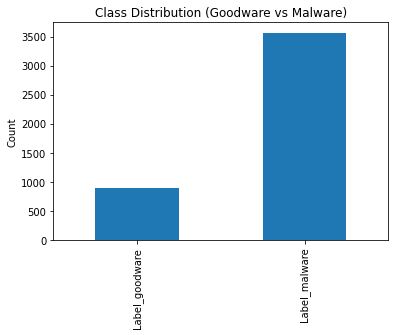

In [88]:
import matplotlib.pyplot as plt

# Plot the class distribution
target_distribution.plot(kind='bar', title="Class Distribution (Goodware vs Malware)")
plt.ylabel('Count')
plt.show()

The distribution shows that this is a highly imbalanced dataset with the minority class being goodware which only makes up only a small percentage of the total dataset. Therefore, we implement SMOTE to create artificial minority instances. 

In [66]:
#!pip install imbalanced-learn

In [11]:
import imblearn

In [89]:
# Separate the features (X) and target (y)
X = malware.drop(columns=['Label_goodware', 'Label_malware'])  # Features
y = malware[['Label_goodware', 'Label_malware']]  # Target columns (goodware and malware)

# Verify the shapes of X and y
print(X.shape)
print(y.shape)

(4465, 241)
(4465, 2)


In [92]:
# Drop rows containing NaN values in the target columns 'Label_goodware' and 'Label_malware'
y_clean = y.dropna()

# Convert one-hot encoded columns into a single class label after cleaning
y_class = y_clean.idxmax(axis=1, skipna=True)

# Check the first few rows of the class labels
print(y_class.head())

0    Label_malware
1    Label_malware
2    Label_malware
3    Label_malware
4    Label_malware
dtype: object


In [95]:
print(X_clean.isna().sum())  # Check for NaN in each feature


ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        1
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Length: 241, dtype: int64


In [96]:
X_clean = X_clean.dropna()  # Remove rows with NaN in features

In [97]:
X_clean = X.loc[y_clean.index]  # Ensure X corresponds to y_clean

In [99]:
# Check for NaN in the feature set (X_clean)
print(X_clean.isna().sum())


ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        1
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Length: 241, dtype: int64


In [100]:
X_clean = X_clean.dropna()  # Remove rows with NaN values
y_clean = y_class[X_clean.index]  # Align the target labels


In [101]:
y_clean = y_class[X_clean.index]  # Ensure y_class matches X_clean


In [102]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled_class = smote.fit_resample(X_clean, y_clean)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled_class).value_counts())


Class distribution after SMOTE:
 Label_malware     3565
Label_goodware    3565
Name: count, dtype: int64


In [108]:
import pandas as pd

# Convert the target to a DataFrame
y_resampled_class_df = pd.DataFrame(y_resampled_class, columns=['Label'])

# Create one-hot encoding for the target
y_resampled_class_df = pd.get_dummies(y_resampled_class_df['Label'])

# Convert True/False to 1/0 in the one-hot encoded DataFrame
y_resampled_class_df = y_resampled_class_df.astype(int)

# Now, concatenate the resampled features (X_resampled) and the one-hot encoded target
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Convert X_resampled to DataFrame with feature names
final_resampled_df = pd.concat([X_resampled_df, y_resampled_class_df], axis=1)

# Check the first few rows of the final resampled dataset
final_resampled_df.head()


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label_goodware,Label_malware
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [109]:
final_resampled_df.to_csv('data/preprocessed/malware_preprocessed.csv', index=False)

### 2. Conduct exploratory data analysis (EDA) to uncover insights related to class distributions, feature correlations, and potential predictors of interest (Tip: consider applying PCA). Summarize key findings that could influence model selection and tuning.

### 3. Outline and justify a strategy for splitting the dataset into training, validation, and test sets, considering any potential class imbalance and the dataset’s characteristics